# Une première classification 



# Nouvelle section

0. Importez les librairies usuelles

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


1. Téléchargez les données du dataset : ```ex2data1.txt``` et insérez les dans un dataframe 

In [2]:
dataset = pd.read_csv("https://raw.githubusercontent.com/JedhaBootcamp/FULL_STACK_24_WEEK_PROGRAM/master/S0.6%20--%20ML%20supervis%C3%A9%20-%20Regressions%20Logistiques%2C%20Naive%20Bayes%20%26%20SVM/S6-A%20-%20R%C3%A9gressions%20Logistiques/2.%20Exercices/Datasets/ex2data1.txt?token=ALKTDDPY77UZGCMX5W44QZS64TDZA", header=None)
dataset.head()

,0,1,2
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


2. Renommez respectivement les colonnes : 

"Col_1" / "Col_2" / "Target"

In [3]:
dataset = dataset.rename(columns= {0: "Col_1",
                        1: "Col_2",
                        2: "Target"}
                        )

dataset.head()

,Col_1,Col_2,Target
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


3. Visualisez les données sous la forme d’un nuage de point où les différentes classes sont indiquées par différents symboles

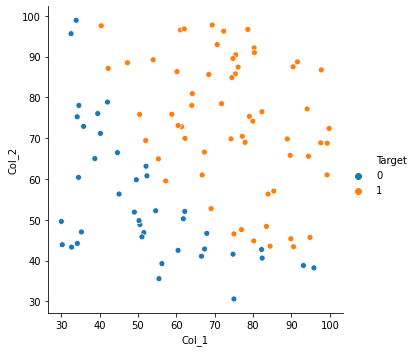

In [4]:
sns.relplot(x=dataset.columns[0], 
            y=dataset.columns[1], 
            hue=dataset.columns[-1], 
            data=dataset)

4. Séparez votre dataset en X pour les variables explicatives et y pour la variable d'entraînement 

In [0]:
X = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1]

5. Séparez les données en échantillon d’apprentissage et échantillon de validation grâce à la commande `from sklearn.model_selection import train_test_split`

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, stratify=y, random_state = 42)

6. Analysez les variables explicatives, y a t’il besoin de les normaliser ? si oui utiliser la fonction vue précédemment pour centrer réduire les variables explicatives.

In [0]:
# Oui il faut normaliser 
from sklearn.preprocessing import StandardScaler

sc_x = StandardScaler()

X_train = sc_x.fit_transform(X_train)
X_test = sc_x.transform(X_test)

7. Utilisez la régression logistique pour classer les données à votre disposition

In [8]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()

classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

8. Regardez votre score sur votre échantillon de test 

In [9]:
classifier.score(X_test, y_test)

0.9333333333333333

9. Regardez votre score moyen sur une cross-validation avec K=10

In [10]:
from sklearn.model_selection import cross_val_score

cross_val_score(classifier,X_train, y_train, cv=10)

array([0.85714286, 1.        , 0.85714286, 0.85714286, 0.71428571,
       1.        , 1.        , 0.85714286, 1.        , 0.57142857])

In [11]:
cross_val_score(classifier,X_train, y_train, cv=10).mean()

0.8714285714285713

10. Produisez les prédictions de votre modèle pour l’echantillon d’apprentissage et l’échantillon test

In [0]:
y_pred = classifier.predict(X_test)

In [13]:
y_pred

array([1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0])

11. Produisez la matrice de confusion pour vos prédictions sur l’échantillon de test et d’apprentissage, que dites vous des performances de votre modèle et son pouvoir de généralisation?

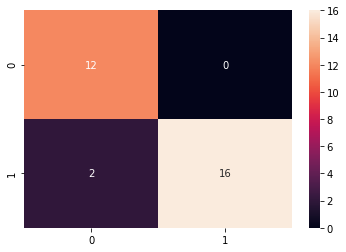

In [14]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)

In [0]:
confusion_matrix?

12. Afficher la courbe ROC de votre modèle pour les données de validation

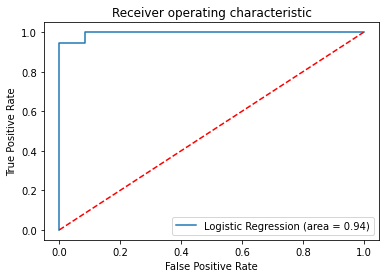

In [16]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test, classifier.predict(X_test))

fpr, tpr, thresholds = roc_curve(y_test, classifier.predict_proba(X_test)[:,1])

plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')

plt.show()

In [17]:
pd.DataFrame(dict(fpr=fpr, tpr=tpr, threshold=thresholds))

,fpr,tpr,threshold
0,0.000000,0.000000,1.996553
1,0.000000,0.055556,0.996553
2,0.000000,0.944444,0.479149
3,0.083333,0.944444,0.357078
4,0.083333,1.000000,0.344581
5,1.000000,1.000000,0.011391


In [18]:
logit_roc_auc

0.9444444444444444